Em certos casos, no início de uma análise, é necessário entender os dados. A clusterização permite a você verificar se existe alguma similaridade nos dados, ou mesmo se existe alguma característica em comum no conjunto. Existem diversas técnicas de clusterização, cada uma com suas particularidades, estas indo deste simples algoritimos de distância, até mesmo redes neurais.

Aqui, vamos aprender a utilizar o KMédias, um algoritimo que através da utilização da distância euclidiana, verifica quais dados tem alguma relação (Pertencem ao mesmo grupo).

## Introdução a clusterização com o conjunto de dados Wine

##### Importando os pacotes necessários para a análise


In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(VIM))
suppressMessages(library(knitr))

Leitura do conjunto de dados

In [6]:
wine <- read.csv2("../../../dados/wine/wine.csv", header = F, sep=",")

In [9]:
head(wine, 3)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185


Vamos renomear nossos atributos, se ficar desse jeito, vai ficar difícil de analisar

In [10]:
wine <- wine %>%
  rename_all( funs (c("tipo",
                      "Alcool",
                      "acido_malico",
                      "cinza",
                      "alcalinidade_cinza",
                      "magnesio",
                      "total_fenolicos",
                      "flavonoides",
                      "nao_flavonoide",
                      "proantocianidina",
                      "intensidade_cor",
                      "hue",
                      "OD280/OD315_diluicao_vinho",
                      "prolina")))

In [11]:
head(wine, 3)

tipo,Alcool,acido_malico,cinza,alcalinidade_cinza,magnesio,total_fenolicos,flavonoides,nao_flavonoide,proantocianidina,intensidade_cor,hue,OD280/OD315_diluicao_vinho,prolina
1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185


Ae, bem melhor, sei que esse conjunto já tem o tipo e não faz sentido clusterizar, mas, por motivos didáticos vamos utilizá-lo. Vamos verificar se há algum **NA** no nosso conjunto.

In [13]:
# Vamos ver se no nosso conjunto contém algum NA
sum(is.na(wine))

[1] 0

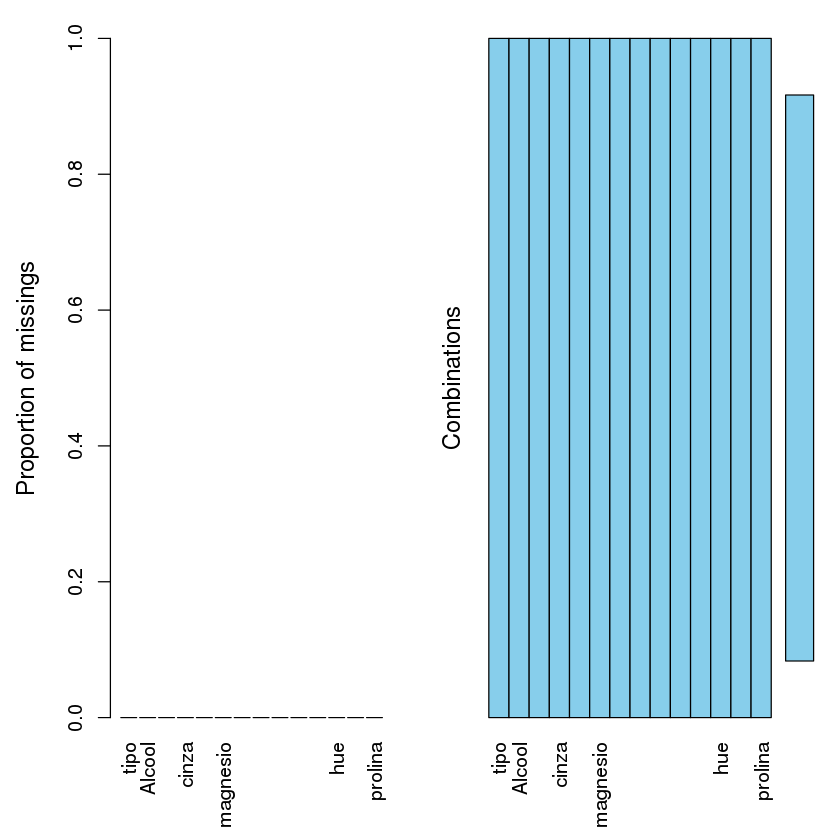

In [14]:
# Caso queira algo mais visual...
aggr(wine)

Se ficou com dúvida no que é ácido málico (assim como eu) lá vai: O ácido málico é uma substância naturalmente encontrada em frutas e legumes – como já vimos, uma das mais ricas fontes de ácido málico são as maçãs. Também está naturalmente presente nas células do corpo e grandes quantidades de ácido málico são produzidas diariamente pelo corpo. O ácido málico possui muitos benefícios relacionados à saúde, tais como aumentar a imunidade do corpo, melhorar a saúde oral, reduzir o risco de acumulação de metais tóxicos no organismo e promover uma pele mais lisa e firme

https://www.mundoboaforma.com.br/acido-malico-o-que-e-para-que-serve-e-beneficios/

Tenho formatar isso - Aliás, essa fonte que eu pesquisei é questionável, a gente pode analisar se os vinhos de maça tem mesmo um alto indice de acido malico. Agora acho que fica mais fácil pesquisar sobre.

Vamos realizar o agrupamento, vamos selecionar os atributos *Alcool* e *Acido málico* e escolher 3 divisões

In [15]:
cluster_set <- wine %>% select(Alcool,acido_malico) %>%
  mutate(Alcool = as.integer(Alcool),
  acido_malico = as.integer(acido_malico)) %>%
  kmeans(centers = 3)

Vou criar um novo conjunto para transferir os valores gerados, talvez não precise fazer isso

In [17]:
# Vamos selecionar alcool e acido malico
new_set <- wine %>%
  select(tipo, Alcool, acido_malico) %>%
  mutate(tipo = as.factor(tipo),
         Alcool = as.numeric(as.character(Alcool)),
         acido_malico = as.numeric(as.character(acido_malico)))

# Vamos adicionar os cluster gerados pelo conjunto
new_set$cluster <- as.factor(cluster_set$cluster)

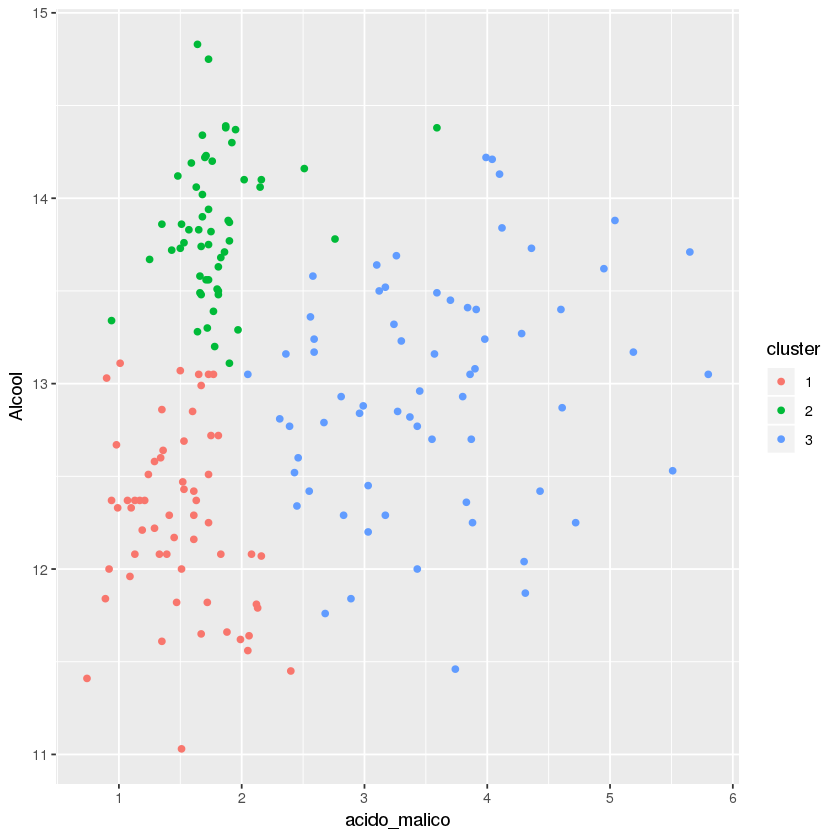

In [18]:
ggplot(new_set, aes(x=acido_malico, y=Alcool, color=cluster)) + geom_point() +
  scale_y_continuous(breaks = seq(11,15))